<a href="https://colab.research.google.com/github/Shadhin282/Machine-learning-problem-Solving/blob/main/Project_Title_Concrete_Strength_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###First of all import some common python libraries which is necessary to continue the program

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error

from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data Set/concrete.csv") #import csv file
df.head() #check the top 5 data rows of total rows and few columns

Cement (component 1)(kg in a m^3 mixture)  \
0                                      540.0   
1                                      540.0   
2                                      332.5   
3                                      332.5   
4                                      198.6   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                0.0       
1                                                0.0       
2                                              142.5       
3                                              142.5       
4                                              132.4       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Water  (component 4)(kg in a m^3 mixture)  \
0                                      162.0   
1                                      162.0   
2                                      228.0   
3                                      228.0   
4                                      192.0   

   Superplasticizer (component 5)(kg in a m^3 mixture)  \
0                                                2.5     
1                                                2.5     
2                                                0.0     
3                                                0.0     
4                                                0.0     

   Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
0                                             1040.0      
1                                             1055.0      
2                                              932.0      
3                                              932.0      
4                                              978.4      

   Fine Aggregate (component 7)(kg in a m^3 mixture)  Age (day)  strength  
0                                              676.0         28     79.99  
1                                              676.0         28     61.89  
2                                              594.0        270     40.27  
3                                              594.0        365     41.05  
4                                              825.5        360     44.30

In [ ]:
dfy = df['strength'] # separate the target columns
dfy.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: strength, dtype: float64

In [ ]:
dfx = df.drop(['strength'], axis = 1) # separate independent features
dfx.head()

Cement (component 1)(kg in a m^3 mixture)  \
0                                      540.0   
1                                      540.0   
2                                      332.5   
3                                      332.5   
4                                      198.6   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                0.0       
1                                                0.0       
2                                              142.5       
3                                              142.5       
4                                              132.4       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Water  (component 4)(kg in a m^3 mixture)  \
0                                      162.0   
1                                      162.0   
2                                      228.0   
3                                      228.0   
4                                      192.0   

   Superplasticizer (component 5)(kg in a m^3 mixture)  \
0                                                2.5     
1                                                2.5     
2                                                0.0     
3                                                0.0     
4                                                0.0     

   Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
0                                             1040.0      
1                                             1055.0      
2                                              932.0      
3                                              932.0      
4                                              978.4      

   Fine Aggregate (component 7)(kg in a m^3 mixture)  Age (day)  
0                                              676.0         28  
1                                              676.0         28  
2                                              594.0        270  
3                                              594.0        365  
4                                              825.5        360

In [ ]:
dfx.isnull().sum() # checking the missing values.

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
dtype: int64

In [ ]:
df.describe() #here we get a summary of these dataset like count, mean, standard deviation, minimum values , maximum values , Q1 = 25%, Q2 = 50%, Q3 = 75%.


Cement (component 1)(kg in a m^3 mixture)  \
count                                1030.000000   
mean                                  281.167864   
std                                   104.506364   
min                                   102.000000   
25%                                   192.375000   
50%                                   272.900000   
75%                                   350.000000   
max                                   540.000000   

       Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
count                                        1030.000000       
mean                                           73.895825       
std                                            86.279342       
min                                             0.000000       
25%                                             0.000000       
50%                                            22.000000       
75%                                           142.950000       
max                                           359.400000       

       Fly Ash (component 3)(kg in a m^3 mixture)  \
count                                 1030.000000   
mean                                    54.188350   
std                                     63.997004   
min                                      0.000000   
25%                                      0.000000   
50%                                      0.000000   
75%                                    118.300000   
max                                    200.100000   

       Water  (component 4)(kg in a m^3 mixture)  \
count                                1030.000000   
mean                                  181.567282   
std                                    21.354219   
min                                   121.800000   
25%                                   164.900000   
50%                                   185.000000   
75%                                   192.000000   
max                                   247.000000   

       Superplasticizer (component 5)(kg in a m^3 mixture)  \
count                                        1030.000000     
mean                                            6.204660     
std                                             5.973841     
min                                             0.000000     
25%                                             0.000000     
50%                                             6.400000     
75%                                            10.200000     
max                                            32.200000     

       Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
count                                        1030.000000      
mean                                          972.918932      
std                                            77.753954      
min                                           801.000000      
25%                                           932.000000      
50%                                           968.000000      
75%                                          1029.400000      
max                                          1145.000000      

       Fine Aggregate (component 7)(kg in a m^3 mixture)    Age (day)  \
count                                        1030.000000  1030.000000   
mean                                          773.580485    45.662136   
std                                            80.175980    63.169912   
min                                           594.000000     1.000000   
25%                                           730.950000     7.000000   
50%                                           779.500000    28.000000   
75%                                           824.000000    56.000000   
max                                           992.600000   365.000000   

          strength  
count  1030.000000  
mean     35.817961  
std      16.705742  
min       2.330000  
25%      23.710000  
50%      34.445000  
75%      46.135000  
max      82.600000

<Axes: xlabel='Cement (component 1)(kg in a m^3 mixture)', ylabel='Count'>

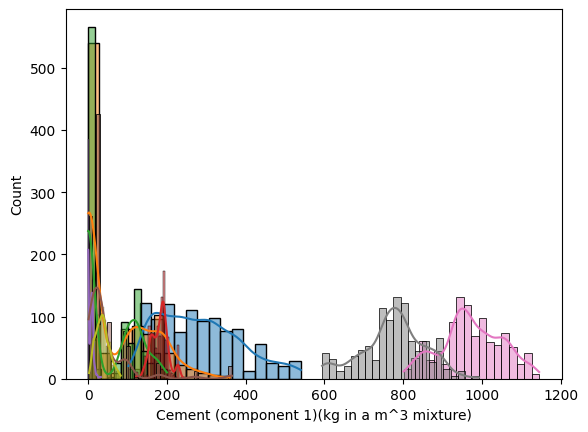

In [ ]:
# Visualize the distribution of the features
sns.histplot(df['Cement (component 1)(kg in a m^3 mixture)'], kde=True),
sns.histplot(df['Blast Furnace Slag (component 2)(kg in a m^3 mixture)'], kde=True),
sns.histplot(df['Fly Ash (component 3)(kg in a m^3 mixture)'], kde=True),
sns.histplot(df['Water  (component 4)(kg in a m^3 mixture)'], kde=True),
sns.histplot(df['Superplasticizer (component 5)(kg in a m^3 mixture)'], kde=True),
sns.histplot(df['Age (day)'], kde=True),
sns.histplot(df['Coarse Aggregate  (component 6)(kg in a m^3 mixture)'], kde=True),
sns.histplot(df['Fine Aggregate (component 7)(kg in a m^3 mixture)'], kde=True),
sns.histplot(df['strength'], kde=True)

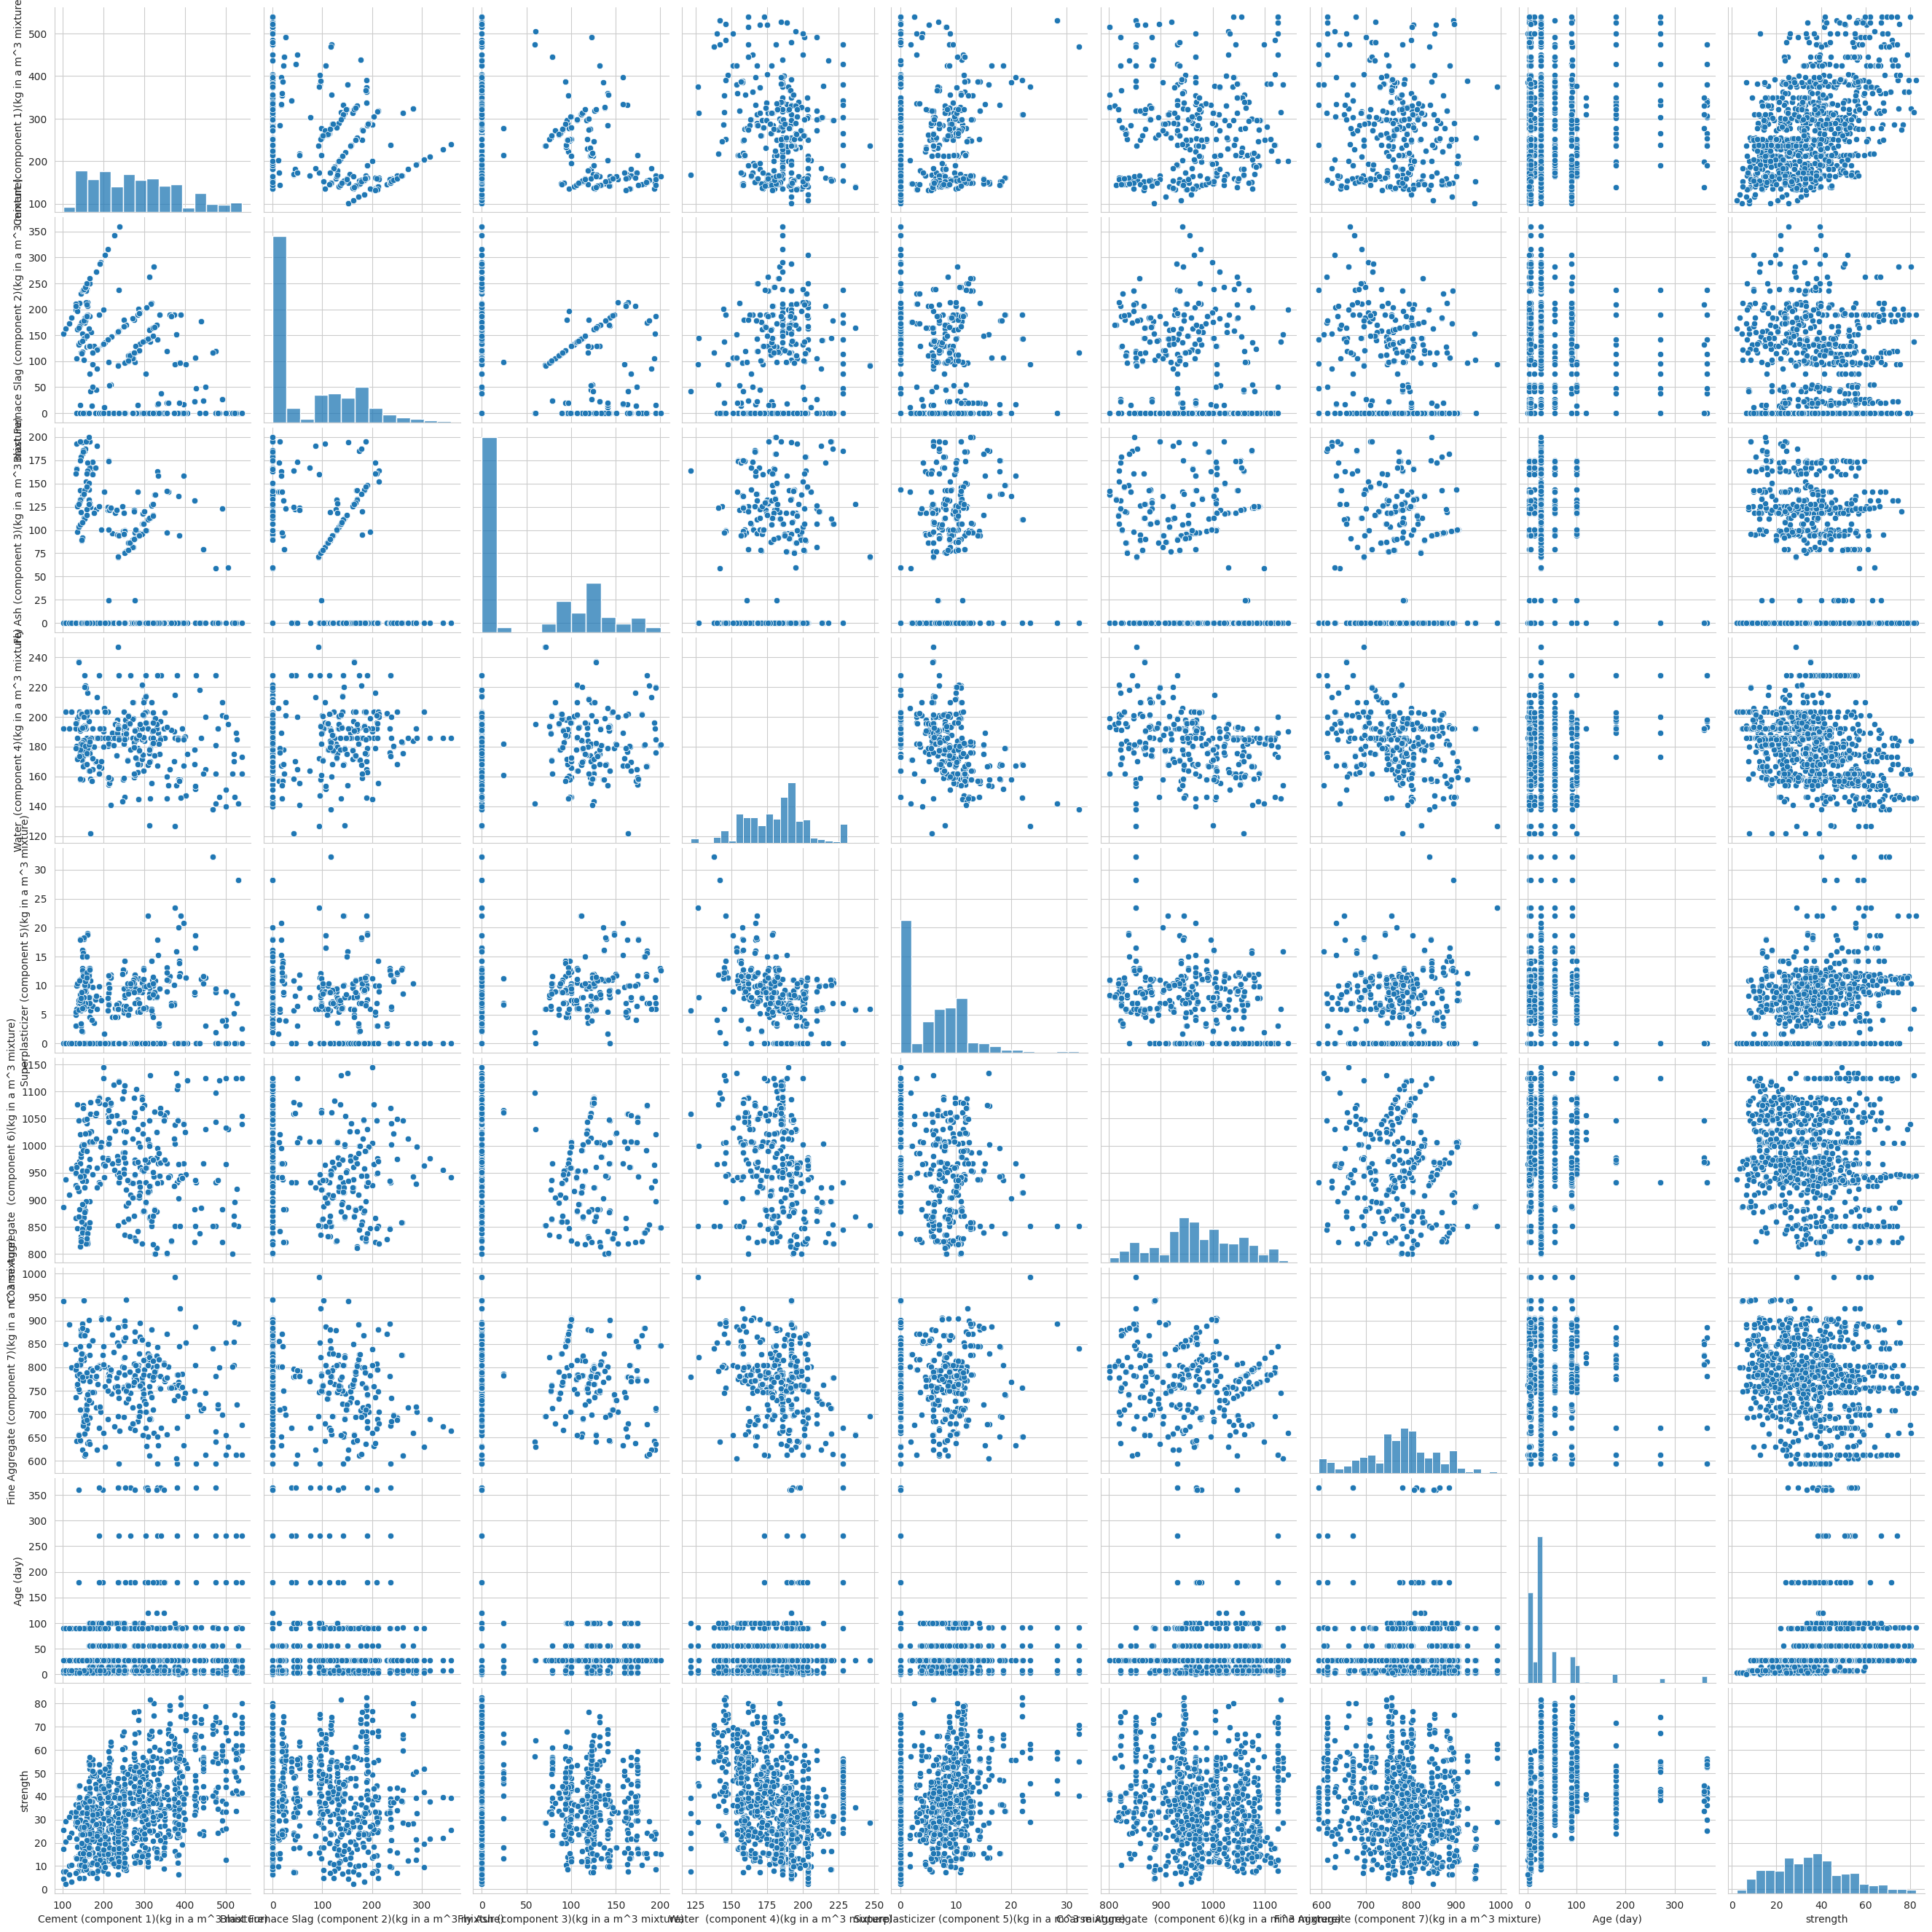

In [ ]:
# here are showing visualization of the feautres with each others how they are related.
plt.close();
sns.set_style("whitegrid");
sns.pairplot(df, size=3);
plt.show()

#Below visualize all the features distribution separately

(<Axes: xlabel='Cement (component 1)(kg in a m^3 mixture)', ylabel='Count'>,)

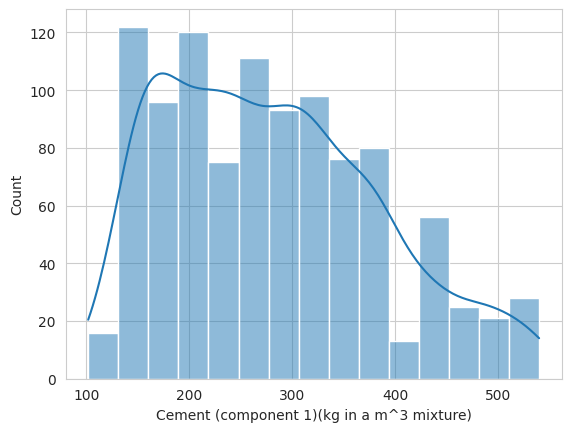

In [ ]:
sns.histplot(df['Cement (component 1)(kg in a m^3 mixture)'], kde=True),


(<Axes: xlabel='Blast Furnace Slag (component 2)(kg in a m^3 mixture)', ylabel='Count'>,)

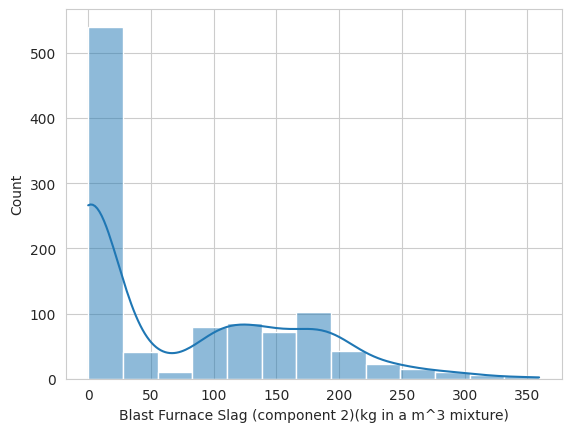

In [ ]:
sns.histplot(df['Blast Furnace Slag (component 2)(kg in a m^3 mixture)'], kde=True),


(<Axes: xlabel='Fly Ash (component 3)(kg in a m^3 mixture)', ylabel='Count'>,)

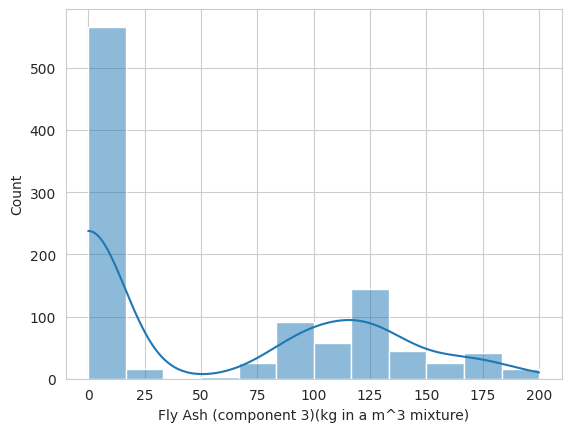

In [ ]:
sns.histplot(df['Fly Ash (component 3)(kg in a m^3 mixture)'], kde=True),


(<Axes: xlabel='Water  (component 4)(kg in a m^3 mixture)', ylabel='Count'>,)

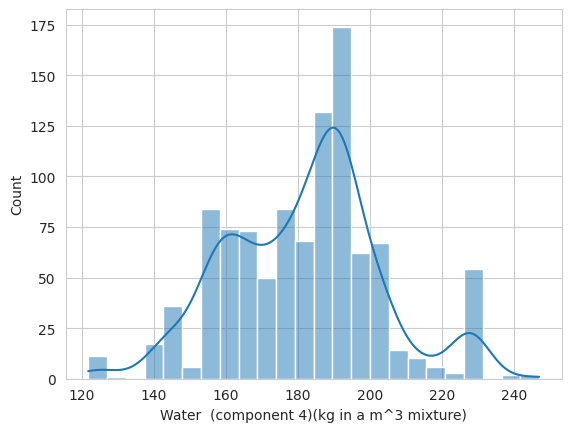

In [ ]:
sns.histplot(df['Water  (component 4)(kg in a m^3 mixture)'], kde=True),


(<Axes: xlabel='Superplasticizer (component 5)(kg in a m^3 mixture)', ylabel='Count'>,)

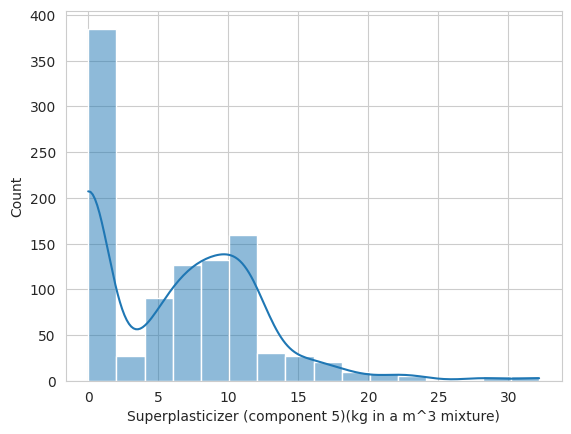

In [ ]:
sns.histplot(df['Superplasticizer (component 5)(kg in a m^3 mixture)'], kde=True),


(<Axes: xlabel='Age (day)', ylabel='Count'>,)

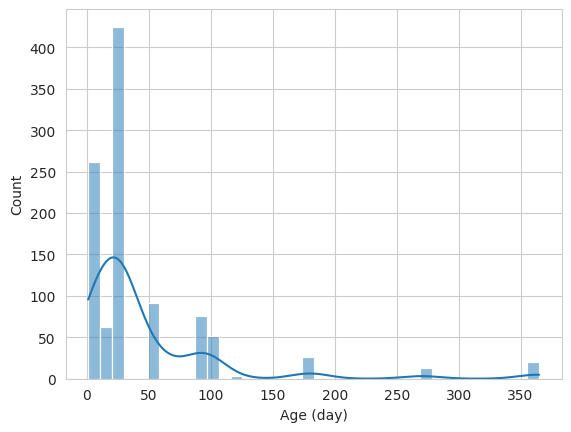

In [ ]:
sns.histplot(df['Age (day)'], kde=True),


(<Axes: xlabel='Coarse Aggregate  (component 6)(kg in a m^3 mixture)', ylabel='Count'>,)

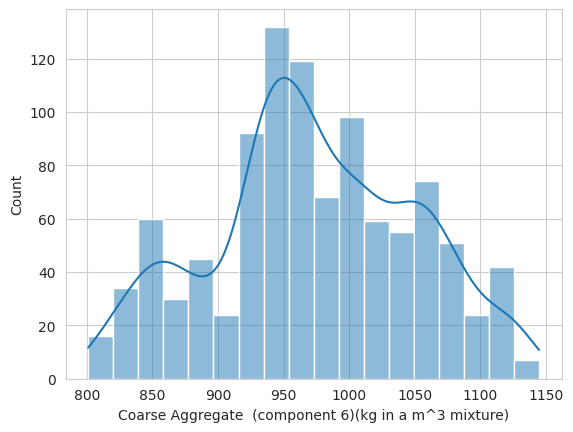

In [ ]:
sns.histplot(df['Coarse Aggregate  (component 6)(kg in a m^3 mixture)'], kde=True),


(<Axes: xlabel='Fine Aggregate (component 7)(kg in a m^3 mixture)', ylabel='Count'>,)

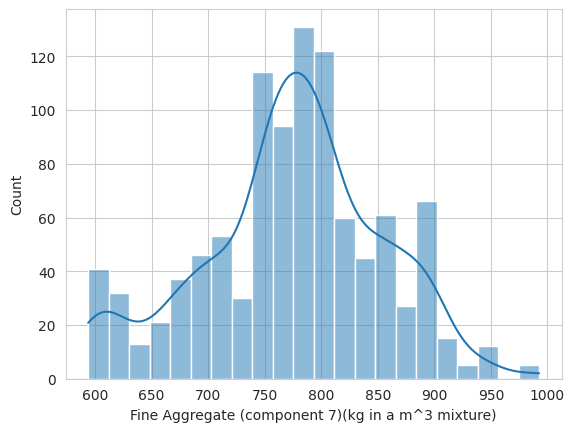

In [ ]:
sns.histplot(df['Fine Aggregate (component 7)(kg in a m^3 mixture)'], kde=True),


<Axes: xlabel='strength', ylabel='Count'>

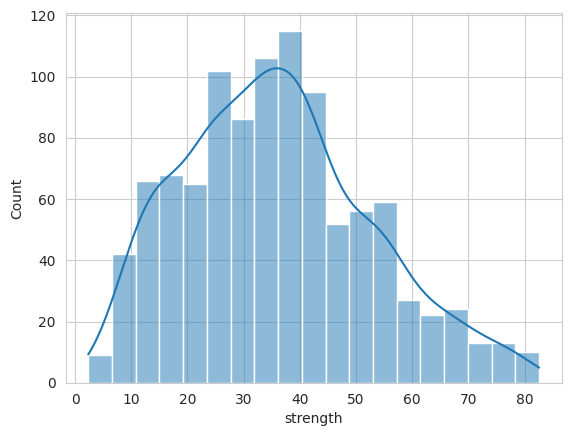

In [ ]:
sns.histplot(df['strength'], kde=True)

#Below findout the outliers and solving

In [ ]:
df.mean() #finding mean of the features

Cement (component 1)(kg in a m^3 mixture)                281.167864
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     73.895825
Fly Ash (component 3)(kg in a m^3 mixture)                54.188350
Water  (component 4)(kg in a m^3 mixture)                181.567282
Superplasticizer (component 5)(kg in a m^3 mixture)        6.204660
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     972.918932
Fine Aggregate (component 7)(kg in a m^3 mixture)        773.580485
Age (day)                                                 45.662136
strength                                                  35.817961
dtype: float64

In [ ]:
df.median() # finding median of the features

Cement (component 1)(kg in a m^3 mixture)                272.900
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     22.000
Fly Ash (component 3)(kg in a m^3 mixture)                 0.000
Water  (component 4)(kg in a m^3 mixture)                185.000
Superplasticizer (component 5)(kg in a m^3 mixture)        6.400
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     968.000
Fine Aggregate (component 7)(kg in a m^3 mixture)        779.500
Age (day)                                                 28.000
strength                                                  34.445
dtype: float64

In [ ]:
df.mode() # finding mode of the features

Cement (component 1)(kg in a m^3 mixture)  \
0                                      362.6   
1                                      425.0   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                0.0       
1                                                NaN       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                         0.0   
1                                         NaN   

   Water  (component 4)(kg in a m^3 mixture)  \
0                                      192.0   
1                                        NaN   

   Superplasticizer (component 5)(kg in a m^3 mixture)  \
0                                                0.0     
1                                                NaN     

   Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
0                                              932.0      
1                                                NaN      

   Fine Aggregate (component 7)(kg in a m^3 mixture)  Age (day)  strength  
0                                              594.0       28.0      33.4  
1                                              755.8        NaN       NaN

In [ ]:
df.std() # finding standard deviation

Cement (component 1)(kg in a m^3 mixture)                104.506364
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     86.279342
Fly Ash (component 3)(kg in a m^3 mixture)                63.997004
Water  (component 4)(kg in a m^3 mixture)                 21.354219
Superplasticizer (component 5)(kg in a m^3 mixture)        5.973841
Coarse Aggregate  (component 6)(kg in a m^3 mixture)      77.753954
Fine Aggregate (component 7)(kg in a m^3 mixture)         80.175980
Age (day)                                                 63.169912
strength                                                  16.705742
dtype: float64

In [ ]:
df.var() # finding the variance of the features

Cement (component 1)(kg in a m^3 mixture)                10921.580220
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     7444.124812
Fly Ash (component 3)(kg in a m^3 mixture)                4095.616541
Water  (component 4)(kg in a m^3 mixture)                  456.002651
Superplasticizer (component 5)(kg in a m^3 mixture)         35.686781
Coarse Aggregate  (component 6)(kg in a m^3 mixture)      6045.677357
Fine Aggregate (component 7)(kg in a m^3 mixture)         6428.187792
Age (day)                                                 3990.437729
strength                                                   279.081814
dtype: float64

In [ ]:
max_z = df.max() # finding the maximum value of the features
min_z = df.min() # finding the minimum value of the features

In [ ]:
max_z

Cement (component 1)(kg in a m^3 mixture)                 540.0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     359.4
Fly Ash (component 3)(kg in a m^3 mixture)                200.1
Water  (component 4)(kg in a m^3 mixture)                 247.0
Superplasticizer (component 5)(kg in a m^3 mixture)        32.2
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     1145.0
Fine Aggregate (component 7)(kg in a m^3 mixture)         992.6
Age (day)                                                 365.0
strength                                                   82.6
dtype: float64

In [ ]:
min_z

Cement (component 1)(kg in a m^3 mixture)                102.00
Blast Furnace Slag (component 2)(kg in a m^3 mixture)      0.00
Fly Ash (component 3)(kg in a m^3 mixture)                 0.00
Water  (component 4)(kg in a m^3 mixture)                121.80
Superplasticizer (component 5)(kg in a m^3 mixture)        0.00
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     801.00
Fine Aggregate (component 7)(kg in a m^3 mixture)        594.00
Age (day)                                                  1.00
strength                                                   2.33
dtype: float64

In [ ]:
df.shape

(1030, 9)

In [ ]:
df2 = df.copy()
df3 = df.copy()
df4 = df.copy()

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
Q1 ,Q3

(Cement (component 1)(kg in a m^3 mixture)                192.375
 Blast Furnace Slag (component 2)(kg in a m^3 mixture)      0.000
 Fly Ash (component 3)(kg in a m^3 mixture)                 0.000
 Water  (component 4)(kg in a m^3 mixture)                164.900
 Superplasticizer (component 5)(kg in a m^3 mixture)        0.000
 Coarse Aggregate  (component 6)(kg in a m^3 mixture)     932.000
 Fine Aggregate (component 7)(kg in a m^3 mixture)        730.950
 Age (day)                                                  7.000
 strength                                                  23.710
 Name: 0.25, dtype: float64,
 Cement (component 1)(kg in a m^3 mixture)                 350.000
 Blast Furnace Slag (component 2)(kg in a m^3 mixture)     142.950
 Fly Ash (component 3)(kg in a m^3 mixture)                118.300
 Water  (component 4)(kg in a m^3 mixture)                 192.000
 Superplasticizer (component 5)(kg in a m^3 mixture)        10.200
 Coarse Aggregate  (component 6)(kg in a m

In [ ]:
IQR = Q3 - Q1
IQR

Cement (component 1)(kg in a m^3 mixture)                157.625
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    142.950
Fly Ash (component 3)(kg in a m^3 mixture)               118.300
Water  (component 4)(kg in a m^3 mixture)                 27.100
Superplasticizer (component 5)(kg in a m^3 mixture)       10.200
Coarse Aggregate  (component 6)(kg in a m^3 mixture)      97.400
Fine Aggregate (component 7)(kg in a m^3 mixture)         93.050
Age (day)                                                 49.000
strength                                                  22.425
dtype: float64

In [ ]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit # these are the outliers

(Cement (component 1)(kg in a m^3 mixture)                -44.0625
 Blast Furnace Slag (component 2)(kg in a m^3 mixture)   -214.4250
 Fly Ash (component 3)(kg in a m^3 mixture)              -177.4500
 Water  (component 4)(kg in a m^3 mixture)                124.2500
 Superplasticizer (component 5)(kg in a m^3 mixture)      -15.3000
 Coarse Aggregate  (component 6)(kg in a m^3 mixture)     785.9000
 Fine Aggregate (component 7)(kg in a m^3 mixture)        591.3750
 Age (day)                                                -66.5000
 strength                                                  -9.9275
 dtype: float64,
 Cement (component 1)(kg in a m^3 mixture)                 586.4375
 Blast Furnace Slag (component 2)(kg in a m^3 mixture)     357.3750
 Fly Ash (component 3)(kg in a m^3 mixture)                295.7500
 Water  (component 4)(kg in a m^3 mixture)                 232.6500
 Superplasticizer (component 5)(kg in a m^3 mixture)        25.5000
 Coarse Aggregate  (component 6)(kg in a

In [ ]:
df[(df<lower_limit)|(df>upper_limit)] # here has highlighted the outliers

Cement (component 1)(kg in a m^3 mixture)  \
0                                           NaN   
1                                           NaN   
2                                           NaN   
3                                           NaN   
4                                           NaN   
...                                         ...   
1025                                        NaN   
1026                                        NaN   
1027                                        NaN   
1028                                        NaN   
1029                                        NaN   

      Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                   NaN       
1                                                   NaN       
2                                                   NaN       
3                                                   NaN       
4                                                   NaN       
...                                                 ...       
1025                                                NaN       
1026                                                NaN       
1027                                                NaN       
1028                                                NaN       
1029                                                NaN       

      Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                            NaN   
1                                            NaN   
2                                            NaN   
3                                            NaN   
4                                            NaN   
...                                          ...   
1025                                         NaN   
1026                                         NaN   
1027                                         NaN   
1028                                         NaN   
1029                                         NaN   

      Water  (component 4)(kg in a m^3 mixture)  \
0                                           NaN   
1                                           NaN   
2                                           NaN   
3                                           NaN   
4                                           NaN   
...                                         ...   
1025                                        NaN   
1026                                        NaN   
1027                                        NaN   
1028                                        NaN   
1029                                        NaN   

      Superplasticizer (component 5)(kg in a m^3 mixture)  \
0                                                   NaN     
1                                                   NaN     
2                                                   NaN     
3                                                   NaN     
4                                                   NaN     
...                                                 ...     
1025                                                NaN     
1026                                                NaN     
1027                                                NaN     
1028                                                NaN     
1029                                                NaN     

      Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
0                                                   NaN      
1                                                   NaN      
2                                                   NaN      
3                                                   NaN      
4                                                   NaN      
...                                                 ...      
1025                                                NaN      
1026                                                NaN      
1027                                                NaN      
1028                                         

In [ ]:
df = df[(df>lower_limit)&(df<upper_limit)]
df #remove outliers

Cement (component 1)(kg in a m^3 mixture)  \
0                                         540.0   
1                                         540.0   
2                                         332.5   
3                                         332.5   
4                                         198.6   
...                                         ...   
1025                                      276.4   
1026                                      322.2   
1027                                      148.5   
1028                                      159.1   
1029                                      260.9   

      Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                   0.0       
1                                                   0.0       
2                                                 142.5       
3                                                 142.5       
4                                                 132.4       
...                                                 ...       
1025                                              116.0       
1026                                                0.0       
1027                                              139.4       
1028                                              186.7       
1029                                              100.5       

      Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   
...                                          ...   
1025                                        90.3   
1026                                       115.6   
1027                                       108.6   
1028                                         0.0   
1029                                        78.3   

      Water  (component 4)(kg in a m^3 mixture)  \
0                                         162.0   
1                                         162.0   
2                                         228.0   
3                                         228.0   
4                                         192.0   
...                                         ...   
1025                                      179.6   
1026                                      196.0   
1027                                      192.7   
1028                                      175.6   
1029                                      200.6   

      Superplasticizer (component 5)(kg in a m^3 mixture)  \
0                                                   2.5     
1                                                   2.5     
2                                                   0.0     
3                                                   0.0     
4                                                   0.0     
...                                                 ...     
1025                                                8.9     
1026                                               10.4     
1027                                                6.1     
1028                                               11.3     
1029                                                8.6     

      Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
0                                                1040.0      
1                                                1055.0      
2                                                 932.0      
3                                                 932.0      
4                                                 978.4      
...                                                 ...      
1025                                              870.1      
1026                                              817.9      
1027                                              892.4      
1028                                         

#After remove outliers show visualization of features each other interaction

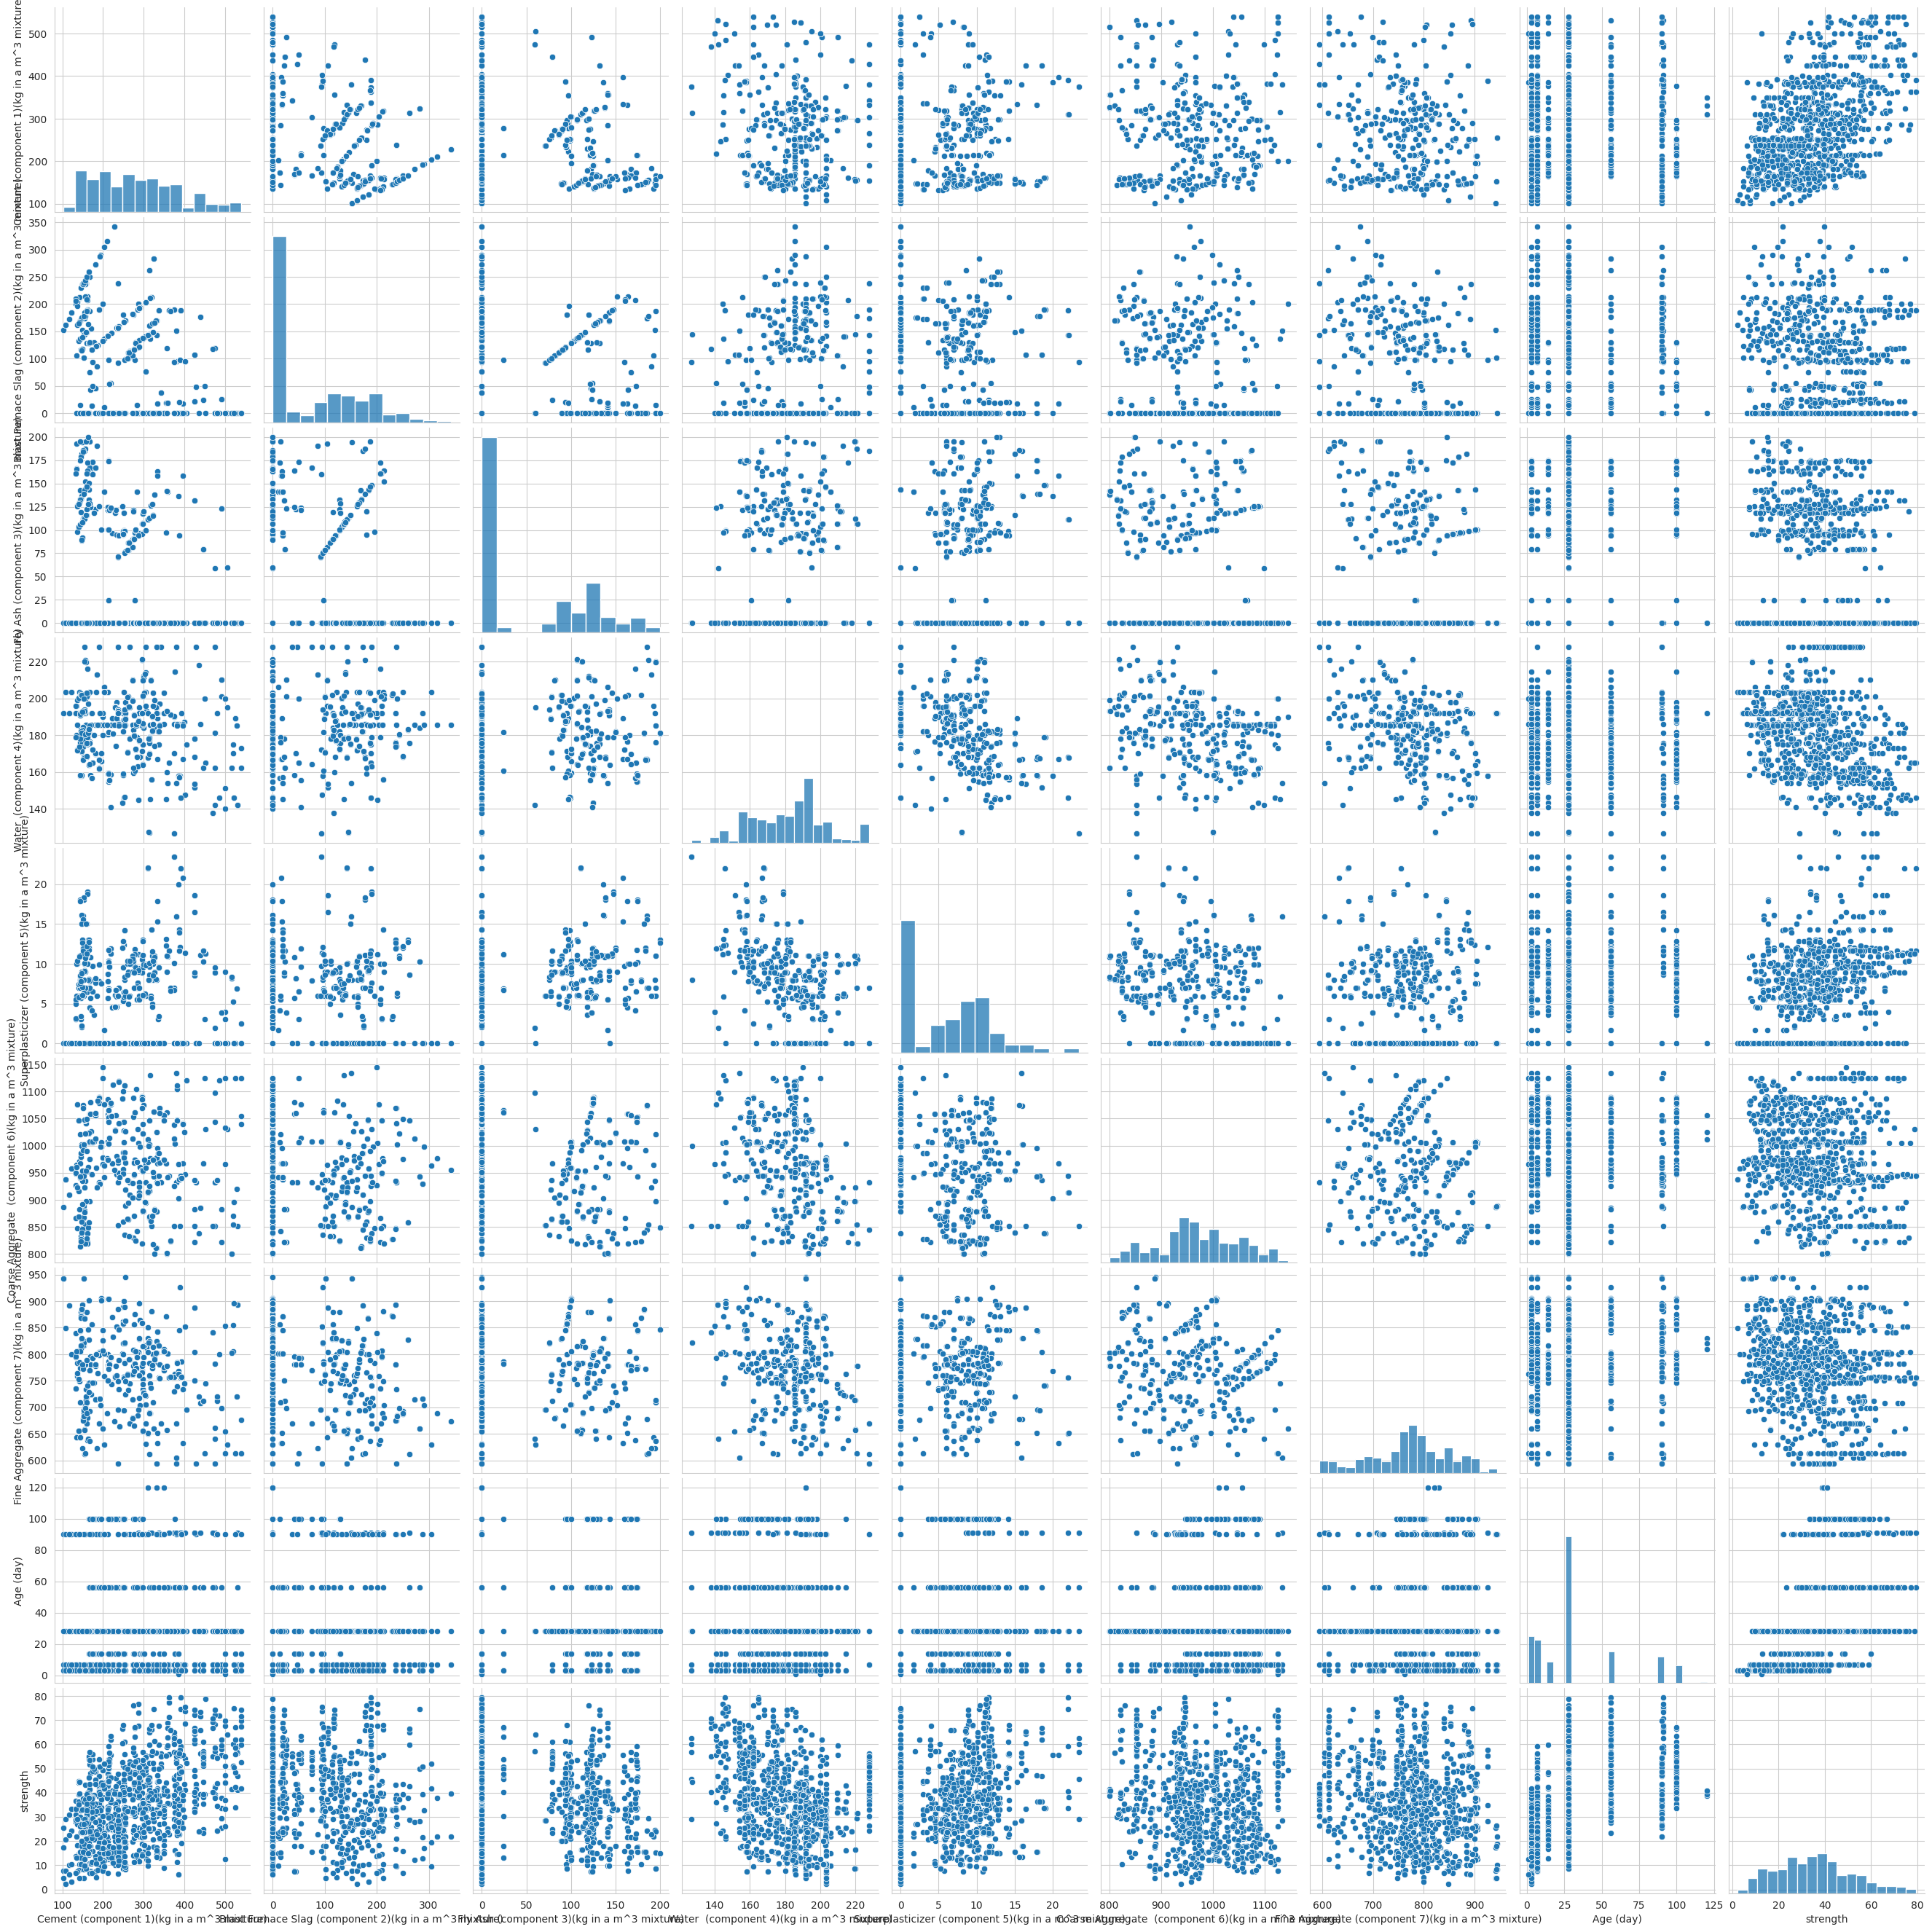

In [ ]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(df, size=3);
plt.show()

In [ ]:
df

Cement (component 1)(kg in a m^3 mixture)  \
0                                         540.0   
1                                         540.0   
2                                         332.5   
3                                         332.5   
4                                         198.6   
...                                         ...   
1025                                      276.4   
1026                                      322.2   
1027                                      148.5   
1028                                      159.1   
1029                                      260.9   

      Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                   0.0       
1                                                   0.0       
2                                                 142.5       
3                                                 142.5       
4                                                 132.4       
...                                                 ...       
1025                                              116.0       
1026                                                0.0       
1027                                              139.4       
1028                                              186.7       
1029                                              100.5       

      Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   
...                                          ...   
1025                                        90.3   
1026                                       115.6   
1027                                       108.6   
1028                                         0.0   
1029                                        78.3   

      Water  (component 4)(kg in a m^3 mixture)  \
0                                         162.0   
1                                         162.0   
2                                         228.0   
3                                         228.0   
4                                         192.0   
...                                         ...   
1025                                      179.6   
1026                                      196.0   
1027                                      192.7   
1028                                      175.6   
1029                                      200.6   

      Superplasticizer (component 5)(kg in a m^3 mixture)  \
0                                                   2.5     
1                                                   2.5     
2                                                   0.0     
3                                                   0.0     
4                                                   0.0     
...                                                 ...     
1025                                                8.9     
1026                                               10.4     
1027                                                6.1     
1028                                               11.3     
1029                                                8.6     

      Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
0                                                1040.0      
1                                                1055.0      
2                                                 932.0      
3                                                 932.0      
4                                                 978.4      
...                                                 ...      
1025                                              870.1      
1026                                              817.9      
1027                                              892.4      
1028                                         

In [ ]:
df.isnull().sum() # checking the missing values due to remove outliers


Cement (component 1)(kg in a m^3 mixture)                 0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     2
Fly Ash (component 3)(kg in a m^3 mixture)                0
Water  (component 4)(kg in a m^3 mixture)                 9
Superplasticizer (component 5)(kg in a m^3 mixture)      10
Coarse Aggregate  (component 6)(kg in a m^3 mixture)      0
Fine Aggregate (component 7)(kg in a m^3 mixture)         5
Age (day)                                                59
strength                                                  4
dtype: int64

In [ ]:
df = df.fillna(df.mean()) # handling missing values

In [ ]:
df.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
strength                                                 0
dtype: int64

#After handling outliers and missing now shown the dataset

In [ ]:
df

Cement (component 1)(kg in a m^3 mixture)  \
0                                         540.0   
1                                         540.0   
2                                         332.5   
3                                         332.5   
4                                         198.6   
...                                         ...   
1025                                      276.4   
1026                                      322.2   
1027                                      148.5   
1028                                      159.1   
1029                                      260.9   

      Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                   0.0       
1                                                   0.0       
2                                                 142.5       
3                                                 142.5       
4                                                 132.4       
...                                                 ...       
1025                                              116.0       
1026                                                0.0       
1027                                              139.4       
1028                                              186.7       
1029                                              100.5       

      Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   
...                                          ...   
1025                                        90.3   
1026                                       115.6   
1027                                       108.6   
1028                                         0.0   
1029                                        78.3   

      Water  (component 4)(kg in a m^3 mixture)  \
0                                         162.0   
1                                         162.0   
2                                         228.0   
3                                         228.0   
4                                         192.0   
...                                         ...   
1025                                      179.6   
1026                                      196.0   
1027                                      192.7   
1028                                      175.6   
1029                                      200.6   

      Superplasticizer (component 5)(kg in a m^3 mixture)  \
0                                                   2.5     
1                                                   2.5     
2                                                   0.0     
3                                                   0.0     
4                                                   0.0     
...                                                 ...     
1025                                                8.9     
1026                                               10.4     
1027                                                6.1     
1028                                               11.3     
1029                                                8.6     

      Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
0                                                1040.0      
1                                                1055.0      
2                                                 932.0      
3                                                 932.0      
4                                                 978.4      
...                                                 ...      
1025                                              870.1      
1026                                              817.9      
1027                                              892.4      
1028                                         

In [ ]:
dfX = df.drop(['strength'], axis = 1) # separate the independent features
dfX.head()

Cement (component 1)(kg in a m^3 mixture)  \
0                                      540.0   
1                                      540.0   
2                                      332.5   
3                                      332.5   
4                                      198.6   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                0.0       
1                                                0.0       
2                                              142.5       
3                                              142.5       
4                                              132.4       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Water  (component 4)(kg in a m^3 mixture)  \
0                                      162.0   
1                                      162.0   
2                                      228.0   
3                                      228.0   
4                                      192.0   

   Superplasticizer (component 5)(kg in a m^3 mixture)  \
0                                                2.5     
1                                                2.5     
2                                                0.0     
3                                                0.0     
4                                                0.0     

   Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
0                                             1040.0      
1                                             1055.0      
2                                              932.0      
3                                              932.0      
4                                              978.4      

   Fine Aggregate (component 7)(kg in a m^3 mixture)  Age (day)  
0                                              676.0  28.000000  
1                                              676.0  28.000000  
2                                              594.0  32.514933  
3                                              594.0  32.514933  
4                                              825.5  32.514933

In [ ]:
dfY = df['strength'] # separate the dependent feature
dfY.head()

0    35.641287
1    61.890000
2    40.270000
3    41.050000
4    44.300000
Name: strength, dtype: float64

#Now below did scaling the Data

In [ ]:
dfz=[feature for feature in dfX.columns]
from sklearn.preprocessing import StandardScaler # scaling the data
std = StandardScaler()



In [ ]:
dfX = std.fit_transform(dfX[dfz])


array([[ 2.47791487, -0.85966202, -0.84714393, ...,  0.86315424,
        -1.22689781, -0.16258082],
       [ 2.47791487, -0.85966202, -0.84714393, ...,  1.05616419,
        -1.22689781, -0.16258082],
       [ 0.49142531,  0.81065732, -0.84714393, ..., -0.52651741,
        -2.26931241,  0.        ],
       ...,
       [-1.27008832,  0.77432055,  0.85063487, ..., -1.03606368,
         0.09518901, -0.16258082],
       [-1.16860982,  1.32874936, -0.84714393, ...,  0.21464081,
         0.20832913, -0.16258082],
       [-0.19403325,  0.31835267,  0.3769452 , ..., -1.39506219,
        -0.13998989, -0.16258082]])

In [ ]:
dfX = pd.concat([pd.DataFrame(dfX, columns=dfz)],
                    axis=1)

In [ ]:
dfX.head()

Cement (component 1)(kg in a m^3 mixture)  \
0                                   2.477915   
1                                   2.477915   
2                                   0.491425   
3                                   0.491425   
4                                  -0.790459   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                          -0.859662       
1                                          -0.859662       
2                                           0.810657       
3                                           0.810657       
4                                           0.692270       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                   -0.847144   
1                                   -0.847144   
2                                   -0.847144   
3                                   -0.847144   
4                                   -0.847144   

   Water  (component 4)(kg in a m^3 mixture)  \
0                                  -0.953028   
1                                  -0.953028   
2                                   2.252287   
3                                   2.252287   
4                                   0.503933   

   Superplasticizer (component 5)(kg in a m^3 mixture)  \
0                                          -0.633759     
1                                          -0.633759     
2                                          -1.090434     
3                                          -1.090434     
4                                          -1.090434     

   Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
0                                           0.863154      
1                                           1.056164      
2                                          -0.526517      
3                                          -0.526517      
4                                           0.070527      

   Fine Aggregate (component 7)(kg in a m^3 mixture)  Age (day)  
0                                          -1.226898  -0.162581  
1                                          -1.226898  -0.162581  
2                                          -2.269312   0.000000  
3                                          -2.269312   0.000000  
4                                           0.673602   0.000000

In [ ]:
dfX.shape

(1030, 8)

In [ ]:
dfY.shape

(1030,)

# Below did feature selection program

In [ ]:
## for feature slection

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [ ]:
### Apply Feature Selection
# first, I specify the Lasso Regression model, and I
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

# Then I use the selectFromModel object from sklearn, which
# will select the features which coefficients are non-zero

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(dfX , dfY)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [ ]:
feature_sel_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [ ]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = dfX.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((dfX.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(feature_sel_model.estimator_.coef_ == 0)))

total features: 8
selected features: 8
features with coefficients shrank to zero: 0


In [ ]:
selected_feat

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)'],
      dtype='object')

In [ ]:
dfX=dfX[selected_feat]

In [ ]:
dfX.head()

Cement (component 1)(kg in a m^3 mixture)  \
0                                   2.477915   
1                                   2.477915   
2                                   0.491425   
3                                   0.491425   
4                                  -0.790459   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                          -0.859662       
1                                          -0.859662       
2                                           0.810657       
3                                           0.810657       
4                                           0.692270       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                   -0.847144   
1                                   -0.847144   
2                                   -0.847144   
3                                   -0.847144   
4                                   -0.847144   

   Water  (component 4)(kg in a m^3 mixture)  \
0                                  -0.953028   
1                                  -0.953028   
2                                   2.252287   
3                                   2.252287   
4                                   0.503933   

   Superplasticizer (component 5)(kg in a m^3 mixture)  \
0                                          -0.633759     
1                                          -0.633759     
2                                          -1.090434     
3                                          -1.090434     
4                                          -1.090434     

   Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
0                                           0.863154      
1                                           1.056164      
2                                          -0.526517      
3                                          -0.526517      
4                                           0.070527      

   Fine Aggregate (component 7)(kg in a m^3 mixture)  Age (day)  
0                                          -1.226898  -0.162581  
1                                          -1.226898  -0.162581  
2                                          -2.269312   0.000000  
3                                          -2.269312   0.000000  
4                                           0.673602   0.000000

#Here Data set separate in training and testing data set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfX, dfY, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(824, 8)

In [ ]:
X_test.shape

(206, 8)

In [ ]:
y_train.shape

(824,)

#Import the Linear regression model and fit in the model and check the performance

In [ ]:
reg = LinearRegression()

In [ ]:
model_r = reg.fit(X_train, y_train)

In [ ]:
model_r.score(X_train, y_train)

0.7146302051449489

In [ ]:
model_r.score(X_test, y_test)

0.6931296621080705

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(degree=2) # polynomial regression with degree 2
x_poly = poly.fit_transform(dfX)

In [ ]:
x_poly.shape

(1030, 45)

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x_poly, dfY, test_size=0.25, random_state=0)

In [ ]:
model2 = LinearRegression()
model2.fit(xtrain, ytrain)

LinearRegression()

In [ ]:
model2.score(xtrain, ytrain) # training

0.849974313709103

In [ ]:
model2.score(xtest, ytest) # testing

0.8303774686941315

In [ ]:
y_pred2 = model2.predict(xtest)

In [ ]:
mse = mean_squared_error(ytest, y_pred2)
print('MSE:', mse)

MSE: 43.196807623275234


In [ ]:
rmse = np.sqrt(mse)
print('RMSE:', rmse)

RMSE: 6.572427833249692


In [ ]:
R_square = r2_score(ytest, y_pred2)
print('R_square:', R_square)

R_square: 0.8303774686941315


In [ ]:
mae = mean_absolute_error(ytest, y_pred2)
print('MAE:', mae)

MAE: 4.863587574329771


#Again Check Random Forest Regression Model and performance

In [ ]:
model_rf = RandomForestRegressor(max_depth=6, random_state=0)


In [ ]:
model_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, random_state=0)

In [ ]:
ypred_rf = model_rf.predict(X_test)

In [ ]:
ypred_rf

array([45.05273709, 42.10476433, 60.50213638, 32.26705283, 11.97842153,
       42.18813165, 26.12859432, 47.13581334, 38.01685529, 39.68388541,
       38.86335907, 16.02272035, 38.69826279, 32.76397966, 24.04773845,
       19.61103284, 34.96067755, 17.80753469, 40.4690981 , 29.92072369,
       39.58061401, 37.5652159 , 44.97762277, 12.92996695, 33.46564701,
       39.9076457 , 14.11306419, 44.13112037, 48.12771636, 14.55657584,
       60.08754007, 35.63641935, 42.76145606, 46.06222185, 14.92744512,
       42.56426757, 38.06924184, 42.31611222,  9.5418103 , 46.54633974,
       17.10789269,  7.37356575, 39.63810017, 54.08575516, 13.08421611,
       67.33870669, 54.55972625, 33.99384687, 31.20733712,  9.29352784,
       47.36358919, 40.83904201, 28.76205765, 16.96541621, 47.91414208,
       34.07600189, 27.68541372, 15.23919563, 39.62609993, 24.34920251,
       42.31611222, 14.38336871, 35.11325903, 50.39858528, 35.55177923,
       28.8545478 , 35.88353779, 13.91414793, 33.78849174, 23.73

In [ ]:
r_square_rf = r2_score(y_test, ypred_rf)
print('R_square:', r_square_rf)

R_square: 0.8293222657646142


In [ ]:
mse_rf = mean_squared_error(y_test, ypred_rf)
print('MSE:', mse_rf)

MSE: 43.9797084947349


In [ ]:
mae_rf = mean_absolute_error(y_test, ypred_rf)
print('MAE:', mae_rf)

MAE: 5.2941160751185805


In [ ]:
rmse_rf = np.sqrt(mse_rf)
print('RMSE:', rmse_rf)

RMSE: 6.6317198745676


#Below did hyperparameter tuning to find the best parameters

In [ ]:
lr_params = {
    'n_estimators' : [101,151,201,251,301],
    #'criterion' : ['gini', 'entropy'],
    'max_depth' : [5,6,15,20,30,35,40],
    'min_samples_split' : [4,6,8,10,12],
    'min_samples_leaf' : [2,3,4,5,6],
    #'max_features' : ['auto', 'sqrt', 'log2']
}



In [ ]:
from sklearn.model_selection import GridSearchCV
lr_gridsearchcv = GridSearchCV(estimator=RandomForestRegressor(random_state=0), param_grid=lr_params, cv=5)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
rf_randomizedsearchcv = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42),
                                           param_distributions=lr_params,
                                           n_iter= 100, cv=5, random_state=42)

In [ ]:
rf_random = rf_randomizedsearchcv.fit(X_train, y_train)

In [ ]:
rf_random.cv_results_

{'mean_fit_time': array([0.58513799, 0.92873607, 0.87597642, 0.30132608, 0.58346791,
        0.62584777, 0.57053061, 0.5667448 , 0.30037341, 0.94169741,
        0.76730709, 1.10772567, 0.55005355, 0.50956259, 0.8162674 ,
        1.12077446, 0.26964235, 0.73701754, 1.13047605, 0.80629234,
        0.2424624 , 0.56969657, 0.28421097, 1.17841868, 0.36799374,
        0.84460897, 0.61842589, 0.37690797, 0.75082703, 0.48099365,
        0.41745081, 0.71821985, 1.00335779, 0.30139694, 0.58143473,
        0.77014518, 0.3389997 , 0.54314799, 0.41698961, 0.42592082,
        0.93740778, 0.86291981, 1.01305127, 0.48784623, 0.6395977 ,
        0.77524319, 0.98422709, 0.85290112, 0.50582895, 1.05610085,
        0.42518635, 0.55634384, 0.95260496, 0.54856133, 0.34139371,
        0.78453879, 0.95903044, 0.65129619, 0.36943259, 0.2403192 ,
        0.59656076, 0.36038342, 0.27858186, 0.96164737, 0.35569592,
        0.52855601, 0.31757112, 0.72454691, 0.46748872, 0.75784969,
        0.93987842, 0.91245508,

In [ ]:
rf_random.best_params_

{'n_estimators': 101,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_depth': 15}

#Here Used best parameter in random forest regression after checking in randomized search CV  and check performance

In [ ]:
model_rf2 = RandomForestRegressor(n_estimators=101, min_samples_split=4, min_samples_leaf =2, max_depth=15, random_state=42)

In [ ]:
model_rf2.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, min_samples_leaf=2, min_samples_split=4,
                      n_estimators=101, random_state=42)

In [ ]:
ypred_rf2 = model_rf2.predict(X_test)

In [ ]:
r_square_rf2 = r2_score(y_test, ypred_rf2)
print('R_square:', r_square_rf2)

R_square: 0.8773957644141127


In [ ]:
mse_rf2 = mean_squared_error(y_test, ypred_rf2)
print('MSE:', mse_rf2)

MSE: 31.59227866155495


In [ ]:
mae_rf2 = mean_absolute_error(y_test, ypred_rf2)
print('MAE:', mae_rf2)

MAE: 4.070662654170709


In [ ]:
rmse_rf2 = np.sqrt(mse_rf2)
print('RMSE:', rmse_rf2)

RMSE: 5.620700904829837


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
from xgboost import XGBRegressor

#Here import Gradient boosting Regression model and check performance

In [ ]:
gbr = GradientBoostingRegressor()

In [ ]:
gbr_r = gbr.fit(X_train, y_train)

In [ ]:
gbr.score(X_test, y_test)

0.8791784863482724

In [ ]:
ypred_gbr = gbr_r.predict(X_test)

In [ ]:
mse_gbr = mean_squared_error(y_test, ypred_gbr)
print('MSE:', mse_gbr)

MSE: 31.132912410047375


In [ ]:
mae_gbr = mean_absolute_error(y_test, ypred_gbr)
print('MAE:', mae_gbr)

MAE: 4.164085396190395


In [ ]:
rmse_gbr = np.sqrt(mse_gbr)
print('RMSE:', rmse_gbr)

RMSE: 5.579687483188227


In [ ]:
r_square_gbr = r2_score(y_test, ypred_gbr)
print('R_square:', r_square_gbr)

R_square: 0.8791784863482724


#Here import XGBRegression model and check performance

In [ ]:
model_xgb = XGBRegressor()

In [ ]:
model_xgb_rf = model_xgb.fit(X_train, y_train)

In [ ]:
model_xgb_rf.score(X_test, y_test)

0.9125060211968276

In [ ]:
ypred_xgb = model_xgb_rf.predict(X_test)

In [ ]:
mse_xgb = mean_squared_error(y_test, ypred_xgb)
print('MSE:', mse_xgb)

MSE: 22.545176733487807


In [ ]:
mae_xgb = mean_absolute_error(y_test, ypred_xgb)
print('MAE:', mae_xgb)

MAE: 3.0737009030869857


In [ ]:
rmse_gbr = np.sqrt(mse_xgb)
print('RMSE:', rmse_gbr)

RMSE: 4.748176148110747


In [ ]:
r_square_xgb = r2_score(y_test, ypred_xgb)
print('R_square:', r_square_xgb)

R_square: 0.9125060211968276


#Here has visualized all the models perfomance

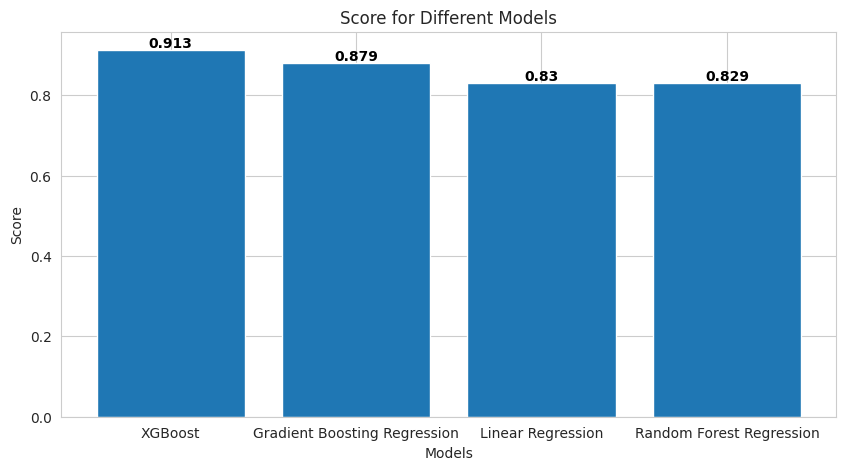

In [ ]:
def plot_histogram(metric_values, model_names, metric_name):
    fig, ax = plt.subplots(figsize=(10, 5))
    bars = plt.bar(model_names, metric_values)
    plt.xlabel('Models')
    plt.ylabel(metric_name)
    plt.title(f'{metric_name} for Different Models')

    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom', color='black', fontweight='bold')
    plt.show()

accuracy_values = [r_square_xgb, r_square_gbr, R_square, r_square_rf]
model_names = ['XGBoost', 'Gradient Boosting Regression', 'Linear Regression', 'Random Forest Regression']
plot_histogram(accuracy_values, model_names, 'Score')

##Here we get maximum score by using XGBoost model which is 91.3% accurate results will be provided.
##During Feature Selection found almost all the features are important.

#### Faces Some difficulties during work in project that is finding outliers, feature selection and scalling But overall it's a great experience and i learn a lot and also more need to learn which i will be improved in coming days.